In [19]:
# importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlb
from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
 


In [20]:
# loading the datasets

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [21]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [22]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [23]:
#checking the shape of the datasets

print(f'train dataset shape: {train.shape}')
print(f'Test dataset shape: {test.shape}')
train.info()

train dataset shape: (23524, 13)
Test dataset shape: (10086, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3

EXPLORATORY DATA ANALYSIS(EDA)

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


- So far, i have ascertained that both the TRAIN and TEST datasets have 11 indepedent variables each. 
- I have also noted that the TRAIN dataset has a target Variable,  'bank_account'

No     20212
Yes     3312
Name: bank_account, dtype: int64


<AxesSubplot:xlabel='bank_account', ylabel='count'>

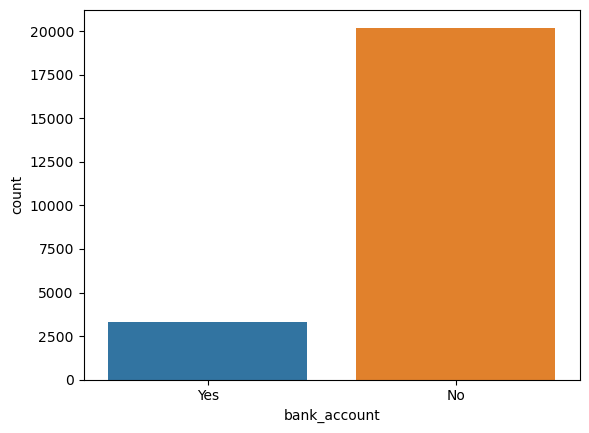

In [25]:
print(train['bank_account'].value_counts())
sns.countplot(data = train, x = 'bank_account')

AxesSubplot(0.125,0.11;0.775x0.77)


Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

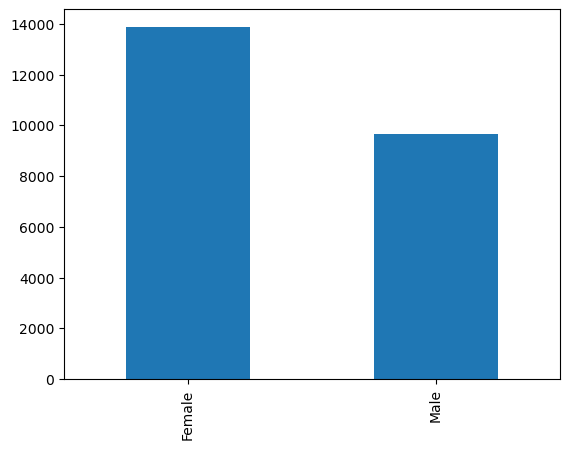

In [26]:

print(train.gender_of_respondent.value_counts().plot(kind='bar'))
train['gender_of_respondent'].value_counts()

Also, i have noted with a lot of concern that the dataset is imbalanced. Most of the interviewees did not have a bank account.
There were more females than males interviewed.


<AxesSubplot:ylabel='marital_status'>

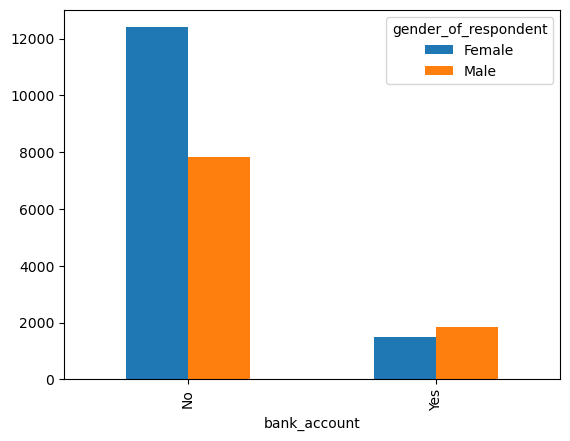

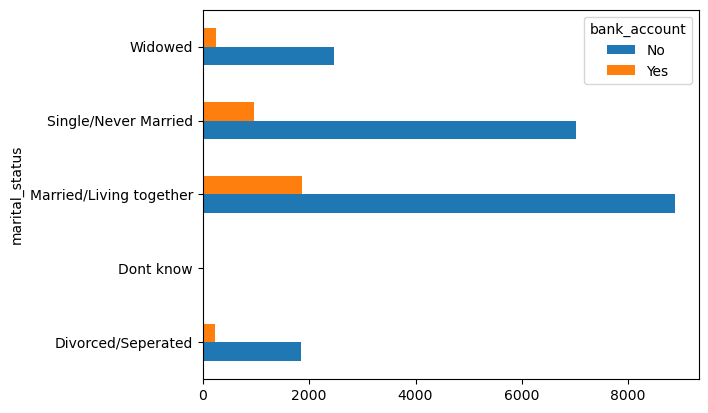

In [27]:
pd.crosstab(train['bank_account'],train['gender_of_respondent']).plot.bar()
pd.crosstab(train['marital_status'],train['bank_account']).plot.barh()

89.32% of the women interviewed did not have a bank account while 81.03% of men did not have a bank account.

In [28]:
# checking for missing values

train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [29]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

I've also come to the conclusion that there are no missing values in the dataset. At least this was perfect.

<AxesSubplot:xlabel='bank_account'>

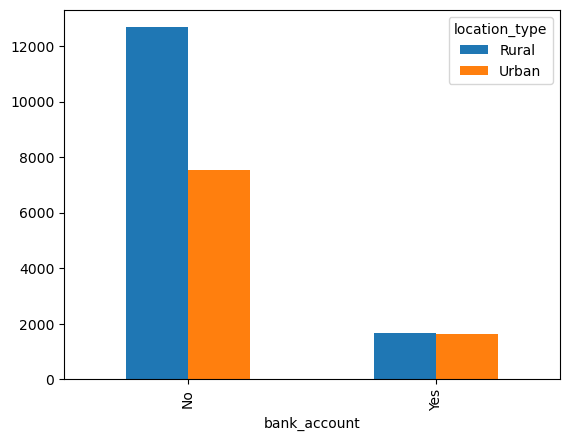

In [30]:
pd.crosstab(train['bank_account'], train['location_type']).plot(kind = 'bar')

DATA PREPARATION FOR MACHINE LEARNING

In [31]:
# using label encoder to convert target column into numerical values, 1 and 0

le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

# separating the train data and target.

X_train = train.drop(['bank_account'], axis = 1)
y_train = train['bank_account']

Below, i have created a function that encodes some categorical features using one hot encoding and the others using LabelEncoder.
Also, I have dropped the unique_id column as it is irrelevant in the training of the model.

In [32]:
'''#function to preprocess data

def preprocessing(data):

    #converting the following vatiables from integer to float.
    float_array = data[['age_of_respondent', 'household_size', 'year']].values.astype(float)

    #categorical encoding using one hot encoder;

    cat = ['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country']

    data = pd.get_dummies(data, prefix_sep="_", columns=cat)

    #the following are converted into numerical form using LabelEncoder

    data['location_type'] = le.fit_transform(data['location_type'])
    data['cellphone_access'] = le.fit_transform(data['cellphone_access'])
    data['gender_of_respondent'] = le.fit_transform(data['gender_of_respondent'])

    #dropping the uniqueid column
    data = data.drop(['uniqueid'], axis=1)

    #scaling the data to the range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)'''

'#function to preprocess data\n\ndef preprocessing(data):\n\n    #converting the following vatiables from integer to float.\n    float_array = data[[\'age_of_respondent\', \'household_size\', \'year\']].values.astype(float)\n\n    #categorical encoding using one hot encoder;\n\n    cat = [\'relationship_with_head\', \'marital_status\', \'education_level\', \'job_type\', \'country\']\n\n    data = pd.get_dummies(data, prefix_sep="_", columns=cat)\n\n    #the following are converted into numerical form using LabelEncoder\n\n    data[\'location_type\'] = le.fit_transform(data[\'location_type\'])\n    data[\'cellphone_access\'] = le.fit_transform(data[\'cellphone_access\'])\n    data[\'gender_of_respondent\'] = le.fit_transform(data[\'gender_of_respondent\'])\n\n    #dropping the uniqueid column\n    data = data.drop([\'uniqueid\'], axis=1)\n\n    #scaling the data to the range of 0 and 1\n    scaler = MinMaxScaler(feature_range=(0, 1))\n    data = scaler.fit_transform(data)'

In [33]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             'country']
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

In [34]:
preproccesed_train = preprocessing_data(X_train)
preprocessed_test = preprocessing_data(test)

In [35]:
# Split train_data

from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(preproccesed_train, y_train, stratify = y_train, 
                                                  test_size = 0.1, random_state=42)

Only 10% of the data will be used for evaluation purposes. The parameter stratify = y_train wiil ensure an equal balance of the classes 'yes' and 'no'. 

I will use various models for my training such as:
 * K Nearest Neighbours
 * RandomForest Classifier
 * AdaClassifier
 * LGBMClaccifier, and some more.

In [36]:
'''
LINEAR SVC Classifier
Kernel is chosen to decide how to cluster the labels
C parameter defines regularization, regulates the influence of parameters 
'Linear' kernel is chosen to leverage Linear SVC
probability is set 'True' to gather probability estimates
random state is set to 0 to shuffle the data to get estimates. 
'''

c = 10
#creating an array of classifiers

classifiers = { 
    'Linear SVC': SVC(kernel='linear', C=c, probability=True, random_state=0),
    #applying the K-Neighbours classifier
    'KNN classifier': KNeighborsClassifier(c),
    #applying Support-Vector Machine(SVM)
    'SVC': SVC(),
    #using Ensemble Classifiers(Random Forest and AdaBoost)
    'RFST': RandomForestClassifier(n_estimators=100), #n_estimators = 100 means the RandomForestClassifier will create 100 decision trees
    'ADA': AdaBoostClassifier(n_estimators=100),
    #Using XGBClassifier
    'XGBClassifier':XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5),
    #Using CatBoostClassifier()
    'CATBOOST CLASSIFIER':CatBoostClassifier() 

}



In [37]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(preproccesed_train, y_train)

    y_pred = classifier.predict(X_Val)
    accuracy = accuracy_score(y_val, y_pred)

    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy*100))
    print(classification_report(y_val, y_pred))

Accuracy (train) for Linear SVC: 87.7% 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2022
           1       0.65      0.27      0.38       331

    accuracy                           0.88      2353
   macro avg       0.77      0.62      0.66      2353
weighted avg       0.86      0.88      0.85      2353



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy (train) for KNN classifier: 89.9% 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2022
           1       0.80      0.37      0.51       331

    accuracy                           0.90      2353
   macro avg       0.85      0.68      0.73      2353
weighted avg       0.89      0.90      0.88      2353

Accuracy (train) for SVC: 89.7% 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2022
           1       0.79      0.36      0.50       331

    accuracy                           0.90      2353
   macro avg       0.85      0.67      0.72      2353
weighted avg       0.89      0.90      0.88      2353

Accuracy (train) for RFST: 98.0% 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2022
           1       0.96      0.90      0.93       331

    accuracy                           0.98      2353
   macro avg     

After running the cell above, I found out the following:

The different models perfomed as follows:
* RandomForestClassifier - 98.0%
* XGBClassifier - 90.7%
* KNeighborsClassifier - 89.9%
* SVC - 89.7%
* AdaBoostClassifier - 88.7%
* Linear SVC - 87.7%
* CatBoostClassifier - 91.5%

RandomForestClassifier perfomed best in this scenario, with an accuracy of 98.0%, while Linear SVC perfomed most poorly with an accuracy of 87.7% (which is pretty good anyway.)

For predicting whether an individual has a bank account or not for the tes data, I will use RandomForestClassifier, since it was the best.

I also found out that the model predicted the 0 class, **'no stroke'** class better than the 1 class **'stroke'**. I think this was because the data provided had more instances of **'no stroke'** than the instances of **'stroke'**. However, an exception occured for the **RandomForestClassifier(n_estimators = 100)** since its predictions for both classes was roughly balanced.

Accuracy for RandomForestClassifier:  98.0025499362516
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2022
           1       0.96      0.90      0.93       331

    accuracy                           0.98      2353
   macro avg       0.97      0.95      0.96      2353
weighted avg       0.98      0.98      0.98      2353



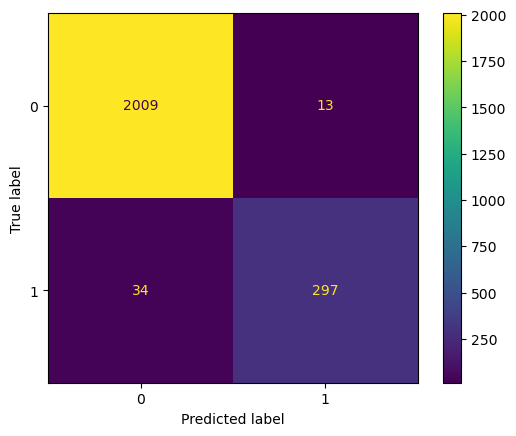

In [38]:
RFST = RandomForestClassifier(n_estimators = 100)

model = RFST.fit(preproccesed_train, y_train)

Y_PRED = model.predict(X_Val)
accuracy = accuracy_score(y_val, Y_PRED)
print('Accuracy for RandomForestClassifier: ', accuracy*100)
print(classification_report(y_val, Y_PRED))


cm = confusion_matrix(y_val, Y_PRED)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [39]:
test['bank_account'] = RFST.predict(preprocessed_test)

In [40]:
submission = pd.DataFrame({'uniqueid': test['uniqueid'] + ' x ' + test['country'], 'bank_account': test['bank_account']})

In [41]:
submission.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [42]:
submission.to_csv('own.csv', index = False)
sub = pd.read_csv('own.csv')
sub.head()


,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
